In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 10000
mass = np.linspace(0.01, 150, N)

In [3]:
def IMF_kroupa(m):
    '''
    Kroupa (2002) initial mass function.
    @in m: stellar mass in solar masses, array input
    @out : number dN of stars in mass bin [m,m+dm] in units of 1/Msun
    '''
    # mass boundaries (in solar masses):
    m1=0.08
    m2=0.50
    m3=1.00
    # spectral indices (broken power law; central values):
    a0=-0.3
    a1=-1.3
    a2=-2.3
    a3=-2.3
    # normalization constants:
    c1=m1**a0/m1**a1
    c2=c1*m2**a1/m2**a2
    c3=c2*m3**a2/m3**a3
    out=np.zeros(m.size)
    for i in range(0,m.size):
        if  (m[i]<=m1):
            out[i]=m[i]**a0
        elif(m[i]<=m2 and m[i]>m1):
            out[i]=c1*m[i]**a1
        elif(m[i]<=m3 and m[i]>m2):
            out[i]=c2*m[i]**a2
        elif(m[i]>=m3):
            out[i]=c3*m[i]**a3
    return out

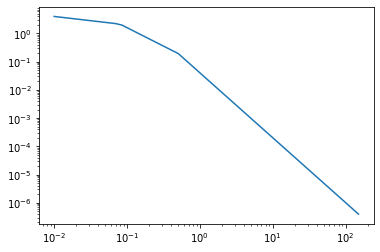

In [5]:
plt.plot(mass, IMF_kroupa(mass))
plt.loglog()
plt.show()

In [6]:
kroupa = IMF_kroupa(mass)
kroupa = kroupa/np.sum(kroupa)
kroupa.sum()

1.0

In [7]:
import scipy.integrate as integrate
def Mass_frac(m1, m2, mL, mU):
    return integrate.quad(lambda m: m*IMF_kroupa(np.array([m])), m1, m2)[0]\
    / integrate.quad(lambda m: m*IMF_kroupa(np.array([m])), mL, mU)[0]
def Number_frac(m1, m2, mL, mU):
    return integrate.quad(lambda m: IMF_kroupa(np.array([m])), m1, m2)[0]\
    / integrate.quad(lambda m: IMF_kroupa(np.array([m])), mL, mU)[0]

In [10]:
# Find out how much of the total SFM have I simulated if 
# my simulations include masses between [m1, m2]
m1 = 5.
m2 = 150.
mL = 0.01
mU = 150.
sim_mass_frac = Mass_frac(m1, m2, mL, mU)

In [11]:
print(f'Roughly {(sim_mass_frac)*100:.2f}% of the initial mass is in stars between [{m1}, {m2}] solar Masses.')


Roughly 27.24% of the initial mass is in stars between [5.0, 150.0] solar Masses.


In [14]:
SFM_CORR = 1/sim_mass_frac
print(f'Need to multiply the simulated SFM by {SFM_CORR:.3f} to get the TOTAL SFM in that galaxy')

Need to multiply the simulated SFM by 3.671 to get the TOTAL SFM in that galaxy
